In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle

In [2]:
df = pd.read_csv('data\emails.csv')
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: telephone interview with the enron re...    2
1     1368   1368  Subject: from mrs fati  dear ,  i crave your i...    1

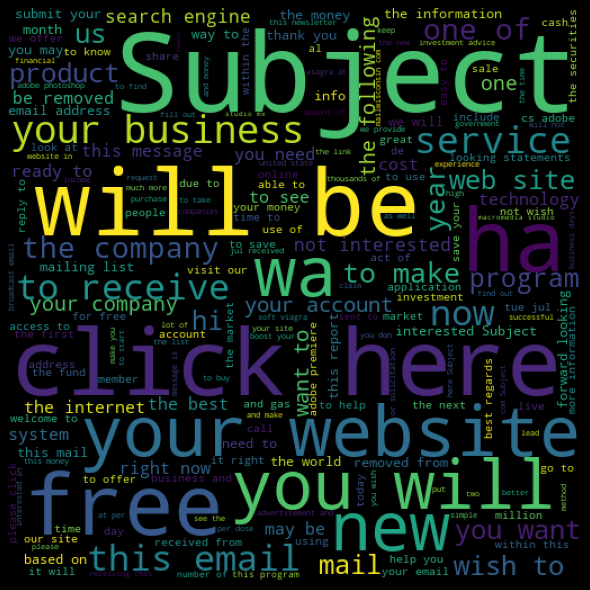

In [4]:
#WordCloud to see the frequently used words
spam_words = ' '.join(list(df[df['spam'] == 1]['text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [5]:
#To test our model we have to split our data into train and test dataset.
#We will use 75% for training and remaining 25% for testing
X_train, X_test, y_train, y_test = train_test_split(df.text,df.spam, test_size=0.25)

In [6]:
#Count vectorizer example to convert text to numbers.
corpus = [
     'This is the first document.', #1
     'This document is the second document.', #2
     'And this is the third one.', #3
     'Is this the first document?', #4
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#unique words in each of the four document above. We have 9 unique words.
#We can take these words and treat each as a feature, as a column. 
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [7]:
#Build a matrix with each of the word. This represents words as count. 
# We can use these individual features 
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [8]:
#Count Vectorizer to convert words into a matrix of features.
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
#We are using Multinomial Naive Bayes model to classify text. For this example we have count of each word to predict
# the label ham or spam.
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
emails = [
    'trading limit and policy changes  vince -  here '' s a summary of what '' s going to the bod , along with updated policy . feel  free to call me if you have any questions .  regards ,  cassandra .'
]
emails_count = v.transform(emails)
test = model.predict(emails_count)
for i in test:
    if i == 0:
        print("ham")
    elif i == 1:
        print("spam")

ham


In [13]:
#Get the model accurancy score
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9916201117318436

In [14]:
#save the count vector file
pickle.dump(v, open('count_vect', 'wb'))

In [15]:
# Saving the model
pickle.dump(model, open('email_class.pkl', 'wb'))